In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [12]:
df = pd.read_csv('sydney_housing/data.csv')#, parse_dates =['date'])

In [13]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [15]:
df.shape

(4600, 18)

In [16]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


### 2.1 Determine which features are cont or cate

In [18]:
# drop rows with price = 0
df = df.drop(df[df.price ==0].index, axis = 0).reset_index(drop = True)

#drop date column
df = df.drop(columns = ['date'])

In [19]:
# create num_col and cat_col
categorical = df.dtypes== 'object'
num_col = df.columns[~categorical]
cat_col = df.columns[categorical]

### 2.2 Visulaize univariate distribution

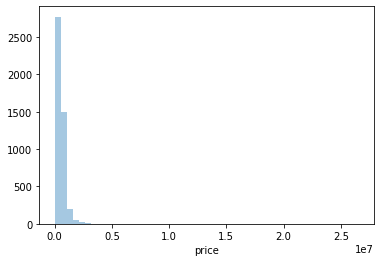

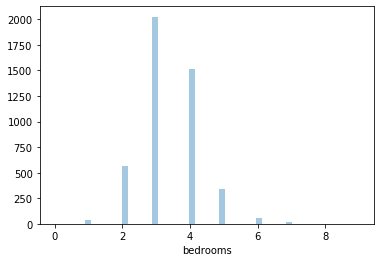

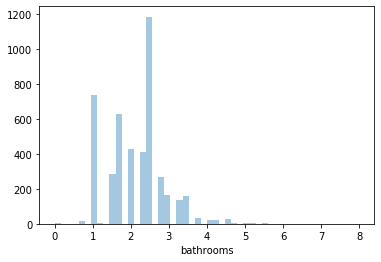

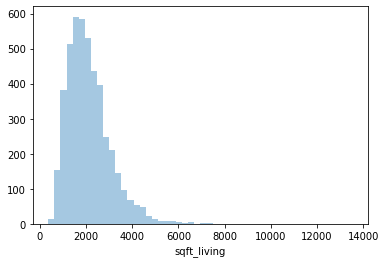

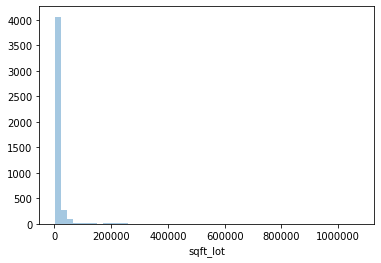

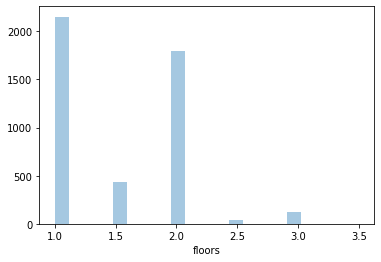

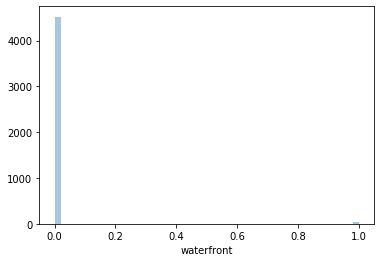

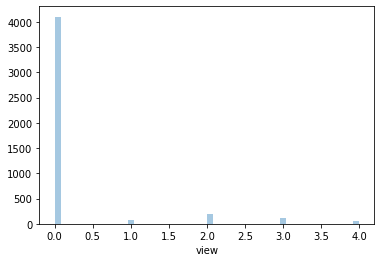

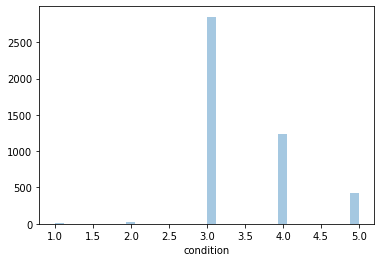

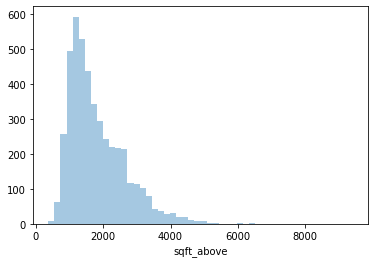

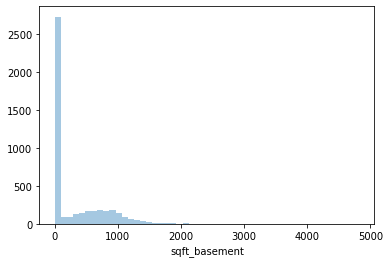

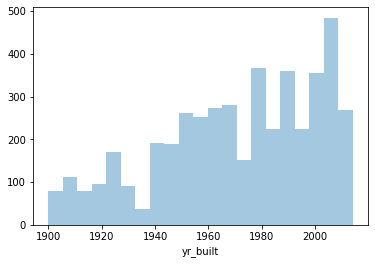

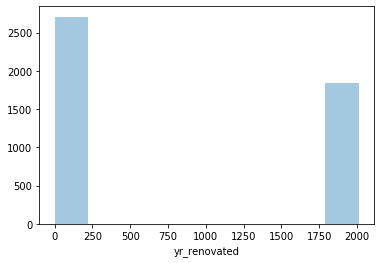

In [26]:
#visualizing distribution of numcol
for col in num_col:
    sns.distplot(df[col], kde = False)
    plt.show()

In [27]:
# EXAMINE OUTLIERS FOR FEATURE: SQFT_LOT

outliers_sqft_lot = df[df.sqft_lot > 400000]
outliers_sqft_lot

# drop item number 1078, unusually big sqft_lot with low price value
df = df.drop(1078).reset_index(drop = True)

In [28]:
# Change values in yr_renovated columns
# not_renovate = 0, renovated = 1
df['renovated'] = df['yr_renovated'].map(lambda x: 0 if x == 0  else 1)

# then drop columns: yr_renovated, street, country
df = df.drop(columns = ['yr_renovated', 'street', 'country', 'statezip'])
df.head()

# Try creating a 'zipcode' column
# But end up drop 'statezip' column because it may overlap with 'city' column
# df['zip_code'] = df['statezip'].str[2:]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,Shoreline,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,Seattle,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,Kent,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,Bellevue,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,Redmond,1


In [29]:
#drop some outliers price: price >5000000

price_outliers = df[df.price > 5000000]
df = df.drop(price_outliers.index).reset_index(drop = True)


### 2.3 Visualize dependencies of the target on each continuous features

In [30]:
target = df.price
features = df.drop(columns = ['price'])

In [31]:
categorical = features.dtypes == 'object'
cat_col = features.columns[categorical]
num_col = features.columns[~categorical]

In [32]:
def plot_scatter(col, features, target):
    sns.scatterplot(features[col], target)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title('Housing price and ' + col)
    plt.show()
    
    

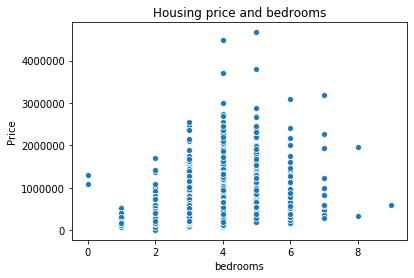

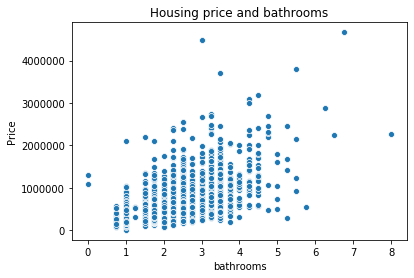

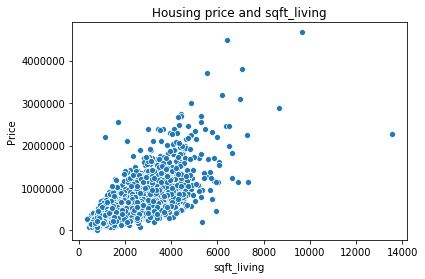

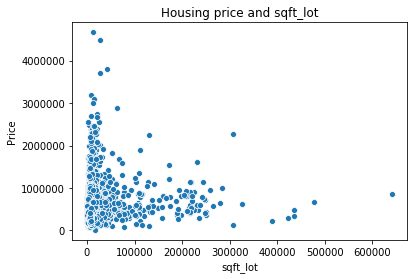

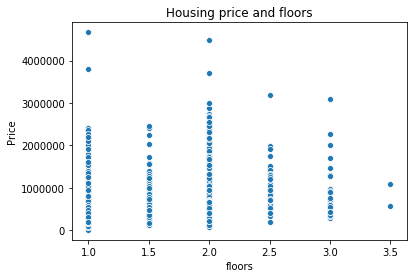

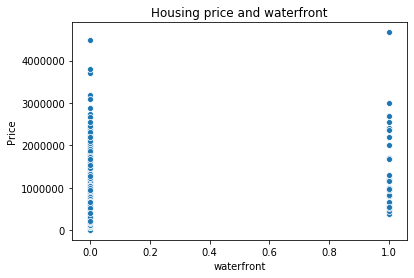

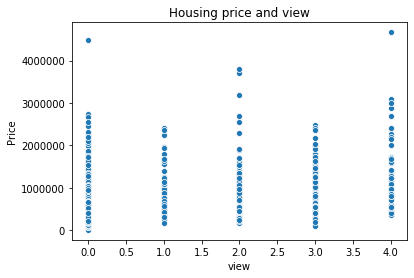

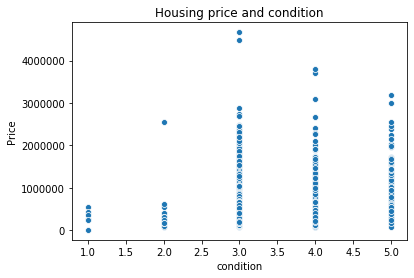

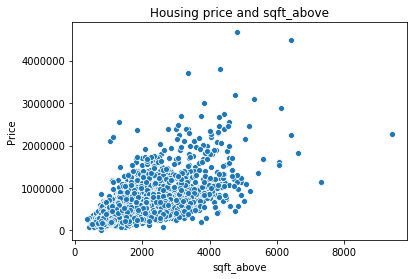

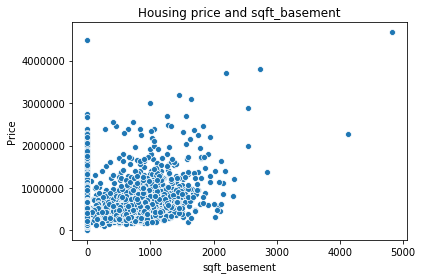

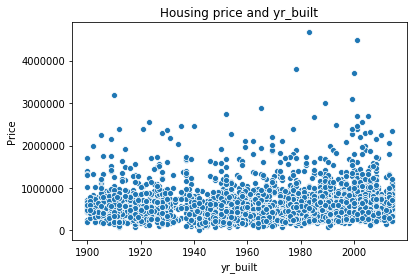

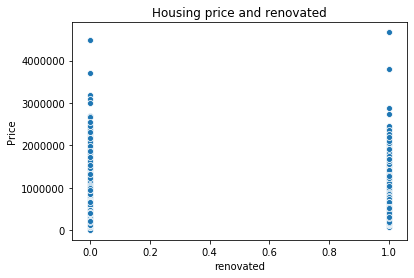

In [33]:
for col in num_col: 
    plot_scatter(col, features, target)

### 2.4 Split, preprocess + OLS/Ridge/Lasso/ElasticNet with cross validation

In [34]:
# There are 2 instances where number of bed and bath = 0. These must be missing values
df[df.bedrooms == 0]
df[df.bathrooms == 0]

df['bedrooms'] = df['bedrooms'].replace(0, np.nan)
df['bathrooms'] = df['bathrooms'] .replace(0, np.nan)

In [35]:
categorical = features.dtypes == 'object'
cat_col = features.columns[categorical]
num_col = features.columns[~categorical]

In [36]:
target = df.price
features = df.drop(columns = ['price'])


In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


In [107]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 1234, test_size = 0.2)

In [108]:
linreg = LinearRegression()
ridge = Ridge()
las = Lasso()
eln = ElasticNet()

models = {'Linear Regression': linreg, 'Ridge Regression': ridge,\
         'Lasso': las, 'Elastic Net': eln}

In [109]:
# te = ce.TargetEncoder()
# te.fit(features.city, target)
# a = te.transform(features.city)

In [110]:
cat_pipe = make_pipeline(ce.TargetEncoder(), StandardScaler())
num_pipe = make_pipeline(SimpleImputer(), StandardScaler())
preprocessing = make_column_transformer((cat_pipe, categorical), (num_pipe, ~categorical))


In [111]:
for model_name, model in models.items():
    pipeline = make_pipeline (preprocessing, model)
    score = cross_val_score(pipeline, X_train, y_train, cv = 10)
    print(model_name)
    print('Mean cv score: ',score.mean())
    print('STD cv score: ',score.std())
    print('----')

Linear Regression
Mean cv score:  0.68450408372674
STD cv score:  0.04482360889613079
----
Ridge Regression
Mean cv score:  0.6845101945507589
STD cv score:  0.04479805817458541
----


C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7371520813795.344, tolerance: 40360765922.12834
  positive)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7395243965133.547, tolerance: 39630444769.2505
  positive)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7464897878374.5625, tolerance: 37696096308.699425
  positive)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

Lasso
Mean cv score:  0.6845041620756677
STD cv score:  0.04482461088841214
----
Elastic Net
Mean cv score:  0.6548726194655343
STD cv score:  0.02686281915818124
----


In [ ]:
# Test data transformation with ColumnTransformer and Pipeline. REMEMBER THE []
# GOT YA! HAHAHAHAHAH!!!
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

In [ ]:
# cat_pipe = Pipeline([('encoder',ce.TargetEncoder()),( 'scaler', StandardScaler())])
# num_pipe = Pipeline([('imputer',KNNImputer()),( 'scaler', StandardScaler())])
# process = ColumnTransformer([('cate_var',cat_pipe, categorical), ('num_var',num_pipe, ~categorical)])

In [ ]:
# process.fit(X_train, y_train)
# abc = process.transform(X_train)
# abc[0]

### 2.5 Tune the model using GridSearchCV

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [112]:
target = df.price
features = df.drop(columns = ['price'])


categorical = features.dtypes == 'object'
cat_col = features.columns[categorical]
num_col = features.columns[~categorical]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 1234, test_size = 0.2)

In [114]:
ols = LinearRegression()
ridge = Ridge()
las = Lasso()
eln = ElasticNet()

models = {'Linear Regression': ols, 'Ridge Regression': ridge,\
         'Lasso': las, 'Elastic Net': eln}

In [115]:
cat_pipe = Pipeline([('target_encoder', ce.TargetEncoder()),('scaler', StandardScaler())])
num_pipe = Pipeline([('impute', SimpleImputer()),('scaler', StandardScaler())])
ct = ColumnTransformer([('cat_pipe', cat_pipe, categorical), ('num_pipe', num_pipe, ~categorical)])

In [126]:

pipe = Pipeline([('transformer', ct), ('ridge', ridge)])
params = {'ridge__alpha': np.logspace(1,2,20)}
grid = GridSearchCV(pipe, param_grid = params, cv = 10, return_train_score = True)
grid.fit(X_train, y_train)
best = grid.best_estimator_
print(grid.best_params_)
print(grid.best_score_)
print(best.score(X_test, y_test))

{'ridge__alpha': 88.58667904100822}
0.6847733062658746
0.643986350282779


In [127]:
def fit_with_GridSearch(model_name,model, model_params):
    pipe = Pipeline([('transformer', ct), (model_name, model)])
    params = model_params
    grid = GridSearchCV(pipe, param_grid = params, cv= 10, return_train_score = True)
    grid.fit(X_train, y_train)
    best = grid.best_estimator_
    print('Best params: ',grid.best_params_)
    print('Best score: ',grid.best_score_)
    print('Score on test set: ',best.score(X_test, y_test))

In [128]:
fit_with_GridSearch('ridge',Ridge(), {'ridge__alpha': np.logspace(1,2,20)})

Best params:  {'ridge__alpha': 88.58667904100822}
Best score:  0.6847733062658746
Score on test set:  0.643986350282779


In [146]:
fit_with_GridSearch('las',Lasso( tol=0.1), {'las__alpha': np.linspace(70,95,20)})

Best params:  {'las__alpha': 81.84210526315789}
Best score:  0.6845172330476172
Score on test set:  0.6449097570081481


In [153]:
fit_with_GridSearch('eln',ElasticNet(tol = 1, max_iter = 1000), {'eln__alpha': np.logspace(1,2,20), 'eln__l1_ratio':np.linspace(0,1,11)})

KeyboardInterrupt: 

In [156]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,Shoreline,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,Seattle,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,Kent,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,Bellevue,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,Redmond,1


In [158]:
df2 = df.drop(columns = 'yr_built')
target = df2.price
features = df2.drop(columns = ['price'])


categorical = features.dtypes == 'object'
cat_col = features.columns[categorical]
num_col = features.columns[~categorical]